<b>Simple Linear Regression</b>

Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets

data read

In [10]:
df = pd.read_csv("C:/Users/prart/Desktop/data/archive/housing.csv")
dfpros = df.drop(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity'], axis = 1)
dfpros.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


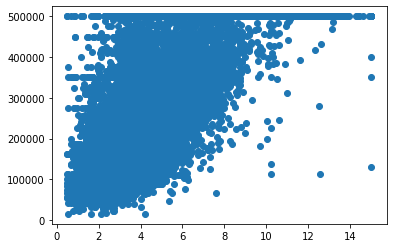

In [11]:
plt.plot(dfpros.median_income, dfpros.median_house_value, 'o')
plt.show()

Data processing and reshaping into useable tensors

In [13]:
nonx = dfpros.median_income.to_numpy()
nony = dfpros.median_house_value.to_numpy()
#nonx, nony = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

x = torch.from_numpy(nonx.astype('float32'))
x = torch.reshape(x, (-1, 1))
y = torch.from_numpy(nony.astype('float32'))
y = y.view(y.shape[0], 1)
print('x = ', x.shape)
print('y = ', y.shape)

x =  torch.Size([20640, 1])
y =  torch.Size([20640, 1])


In [14]:
n_samples, n_features = x.shape

In [15]:
inputs = n_features
outs = 1
model = nn.Linear(inputs, outs)

<function matplotlib.pyplot.show(close=None, block=None)>

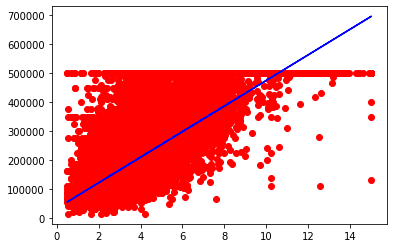

In [16]:
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)
num_epoch = 300
for epoch in range(num_epoch):
    ypred = model(x)
    loss = criterion(ypred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #print(epoch, loss.item())

pred = model(x).detach().numpy()
plt.plot(nonx, nony, 'ro')
plt.plot(nonx, pred, 'b')
plt.show